In [1]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [11]:
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
dataset = load_iris()
X = pd.DataFrame(dataset.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y=pd.DataFrame(dataset.target)
y.columns=['Targets']
plt.figure(figsize=(14,7))
colormap = np.array(['red','lime','black'])

<Figure size 1008x504 with 0 Axes>

Text(0.5, 1.0, 'Real')

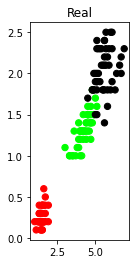

In [13]:
plt.subplot(1,3,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('Real')

Text(0.5, 1.0, 'KM')

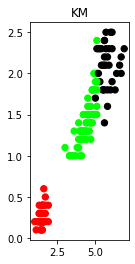

In [14]:
plt.subplot(1,3,2)
model = KMeans(n_clusters=3)
model.fit(X)
predY = np.choose(model.labels_,[0,1,2]).astype(np.int64)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[predY],s=40)
plt.title('KM')

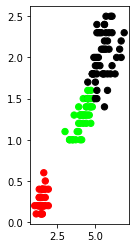

In [15]:
plt.subplot(1,3,3)
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa,columns=X.columns)
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
y_cluster_gmm = gmm.predict(xs)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_cluster_gmm],s=40)